In [1]:
from pricing_environment import PricingEnvironment
from pricing_agent import GPUCBAgent
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_cust=100
norm_dem_curve=lambda p: 1-1/(1+np.exp(-4*(p)+1))

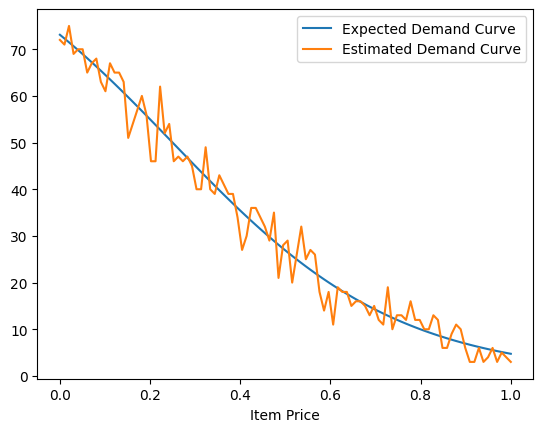

In [3]:
y=norm_dem_curve
prices=np.linspace(0,1,100)
estimated_demand_curve = np.random.binomial(n_cust, norm_dem_curve(prices))

plt.figure()
plt.plot(prices, n_cust*norm_dem_curve(prices), label='Expected Demand Curve')
plt.plot(prices, estimated_demand_curve, label='Estimated Demand Curve')
plt.xlabel('Item Price')
plt.legend()
plt.show()

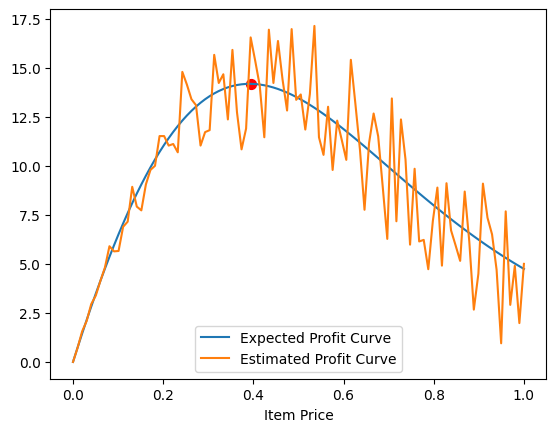

In [4]:
cost = 0.0

expected_profit_curve = n_cust*norm_dem_curve(prices)*(prices-cost)

estimated_profit_curve = np.random.binomial(n_cust, norm_dem_curve(prices))*(prices-cost)

best_price_index = np.argmax(expected_profit_curve)
best_price = prices[best_price_index]

plt.figure()
plt.plot(prices, expected_profit_curve, label='Expected Profit Curve')
plt.plot(prices, estimated_profit_curve, label='Estimated Profit Curve')
plt.scatter(best_price, expected_profit_curve[best_price_index], color='red', s=50)
plt.xlabel('Item Price')
plt.legend()
plt.show()

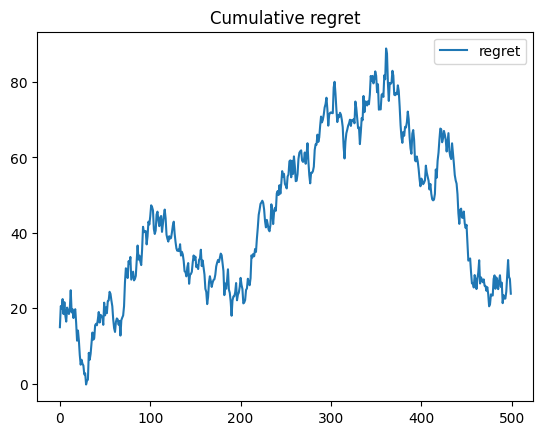

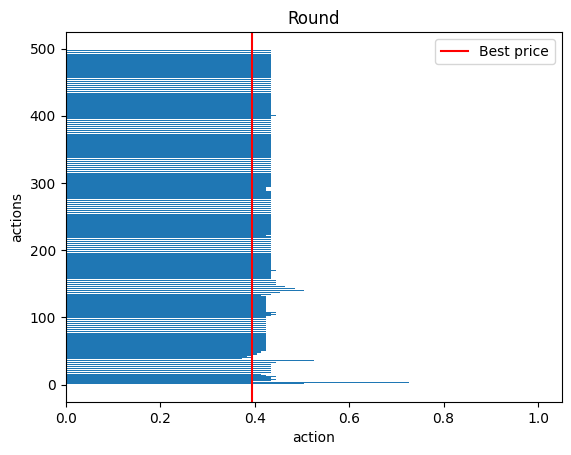

In [5]:
T=500
num_cust=100
pulls=np.array([])
rewards=np.array([])
clair_reward=np.array([])
env=PricingEnvironment(norm_dem_curve,cost)
agent=GPUCBAgent(T)

for t in range(T):
    p_t = agent.pull_arm()
    d_t, r_t = env.round(p_t, num_cust)
    agent.update(r_t/num_cust)
    rewards = np.append(rewards, r_t-d_t*cost)
    pulls=np.append(pulls,p_t)
    dc,rc=env.round(best_price,num_cust)
    clair_reward = np.append(clair_reward, rc-dc*cost)


    
cum_clair_reward=np.cumsum(clair_reward)
cum_reward=np.cumsum(rewards)
plt.plot(cum_clair_reward-cum_reward,label='regret')
plt.title('Cumulative regret')
plt.legend()
plt.figure()
plt.barh(np.arange(T),pulls)
plt.axvline(best_price, color='red', label='Best price')
plt.ylabel('actions')
plt.xlabel('action')
plt.legend()
plt.title('Round')
plt.show()

In [6]:
agent.pull_arm(),best_price

(0.43434343434343436, 0.393939393939394)

In [35]:
norm_dem_curve(agent.pull_arm())*agent.pull_arm(),norm_dem_curve(best_price)*best_price

(0.14154491580301068, 0.1417824745704411)

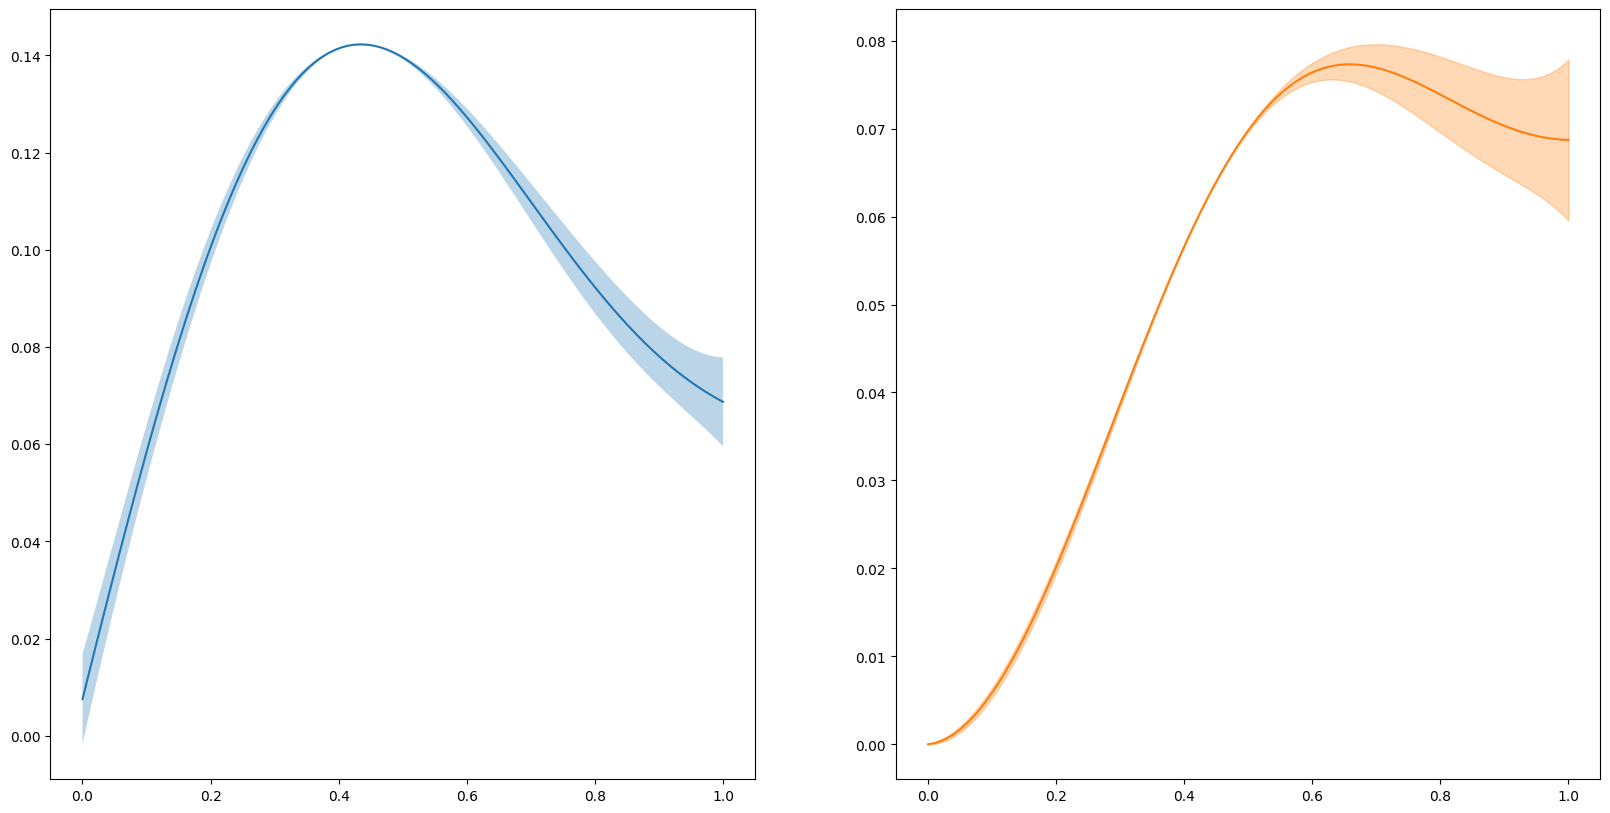

In [7]:
price_range=np.linspace(0,1,100)
mu, sigma = agent.gp.predict(price_range)
profit_mu, profit_sigma = mu*(price_range-cost), sigma*(price_range-cost)

f,ax = plt.subplots(1,2, figsize=(20,10))
ax[0].plot(price_range, mu)
ax[0].fill_between(price_range, mu-sigma, mu+sigma, alpha=0.3)
ax[1].plot(price_range, profit_mu, color='C1')
ax[1].fill_between(price_range, profit_mu-profit_sigma, profit_mu+profit_sigma, alpha=0.3, color='C1')
plt.show()

In [11]:
x=np.linspace(0,1,100)
arg=np.argmax(norm_dem_curve(x))
x[arg]

0.0